In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

We are trying to make some data for a linear model: $y=a_1*x_1 + a_2*x_2$ where $x_2$ is always 1 to make the function univariant

In [2]:
n=100

- make up the matrix `x`

In [27]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)  # the trailing `_` means 'do it in_place'
x[:5]

tensor([[0.1091, 1.0000],
        [0.5888, 1.0000],
        [0.4879, 1.0000],
        [0.7873, 1.0000],
        [0.8777, 1.0000]])

> the above code is equivalent to using numpy as below:

In [28]:
x_in_np = np.random.uniform(-1., 1, size=(n,2))
x_in_np[:,1] = 1.
x_in_np[:5]

array([[-0.168914,  1.      ],
       [ 0.428598,  1.      ],
       [-0.302656,  1.      ],
       [-0.918999,  1.      ],
       [-0.89627 ,  1.      ]])

In [37]:
a = tensor(3.,2); a
# .reshape(-1,1)

tensor([3., 2.])

In [42]:
y = x@a + torch.rand(n)  # (100x2)@(2x1) => 100x1 or just a 100-long vector; one dimsional Tensor plays along well, no need to reshape

In [49]:
# works well too in numpy
(x.numpy() @ a.numpy()).shape

(100,)

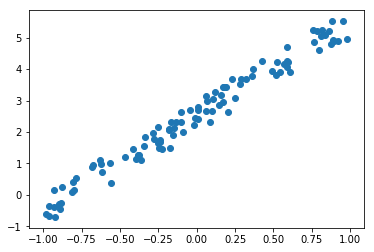

In [50]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [51]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [98]:
a = tensor(-1.,1)

In [53]:
y_hat = x@a
mse(y_hat, y)

tensor(7.3524)

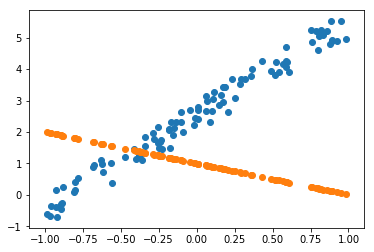

In [58]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat,);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [104]:
a = tensor(-1.,1)
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [105]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()    # backprop
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [106]:
lr = 0.9
for t in range(100): update()

tensor(7.3524, grad_fn=<MeanBackward1>)
tensor(0.1045, grad_fn=<MeanBackward1>)
tensor(0.0779, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)


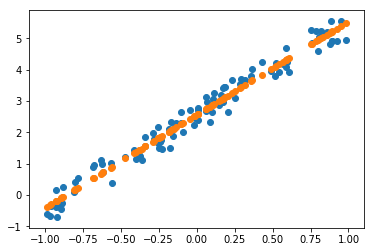

In [107]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [108]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [109]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.